In [1]:
import tslearn
import numpy as np
import pandas as pd

In [71]:
df_input = pd.read_csv('dataset.csv',header=None)
np_input = df_input.values
print(np_input[0][:].shape)

(409,)


In [3]:
from tslearn.utils import to_time_series_dataset
number_of_stations= np_input.shape[0]
number_of_timesteps =  (int)((np_input.shape[1]-1 )/2)
number_of_features = 2 # min max
X_train = np.zeros(( number_of_stations, number_of_timesteps,  number_of_features  ))
for i in range(number_of_stations):     #np_input.shape[0]):
    
    time_steps = (int)((np_input.shape[1]-1 )/2)
#     print(time_steps)
    ts = np.zeros(( time_steps , 2 ))
    for j in range(1,np_input.shape[1],2):
        [mi,ma] = [ np_input[i][j],np_input[i][j+1] ]
        ts[(int)((j-1)/2)] = [mi,ma]
#     print(ts.shape)
    X_train[i] = ts
    
print(X_train.shape)


(32, 204, 2)


c:\users\chinmay\appdata\local\programs\python\python37\lib\site-packages\tslearn\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [7]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=6, metric="dtw",max_iter = 900,tol = 1e-08,random_state= 12)
km.fit(X_train)


0 [[ 0]
 [ 3]
 [ 4]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [13]
 [16]
 [17]
 [21]
 [23]
 [27]
 [28]
 [30]
 [31]]
1 [[18]]
2 [[29]]
3 [[ 6]
 [14]
 [15]
 [20]
 [25]
 [26]]
4 [[22]]
5 [[ 1]
 [ 2]
 [ 5]
 [12]
 [19]
 [24]]


In [58]:
predictions = km.predict(X_train)
c_assign = np.zeros(32)
for k in range(6):
    c_0 = np.argwhere(predictions==k)
    c_assign[c_0] = k
#     print(k,c_0)
print(c_assign)
    

[0. 5. 5. 0. 0. 5. 3. 0. 0. 0. 0. 0. 5. 0. 3. 3. 0. 0. 1. 5. 3. 0. 4. 0.
 5. 3. 3. 0. 0. 2. 0. 0.]


In [6]:
# Assign cluster assignments
print(X_train.shape)

(32, 204, 2)


In [55]:
five_station_max =  X_train.T[0]
# two_station_min_max = X_train[18,29]
print(five_station_max.shape)
print(five_station_max[:5])

(204, 32)
[[102.          33.          48.         100.15        36.
   88.          56.          55.          80.          57.
   48.          60.          40.33333333  41.          68.
   74.67        52.23333333  40.         129.          69.33333333
   90.1         60.39333333  37.33333333  66.         436.
   62.33333333  84.52        42.          35.          58.
   39.93        63.59      ]
 [ 55.          79.          58.          75.93        56.
   48.          85.         106.          62.          74.
   47.          43.33333333  68.66666667  52.66666667  98.66666667
  100.13333333  70.33333333  57.         116.          70.
  126.88        63.63666667  62.66666667  97.          52.
   84.33333333  71.68666667  55.33333333  60.         113.66666667
  413.01        70.80333333]
 [ 56.         100.          63.66666667 101.07        74.
   74.         122.          77.66666667  75.          96.66666667
  100.         110.         114.          65.         146.
  103.7        

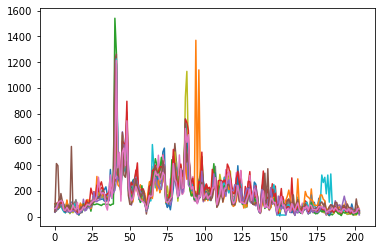

In [51]:

# one_station_min_max.reshape((1,204,2))

# np.reshape(one_station_min_max,(1,204,2) )

one_station_max = one_station_min_max.T[0]
x = [ i for i in range(204)]
# print(x.s)
y = five_station_max
from matplotlib import pyplot as plt
plt.plot(x,y)

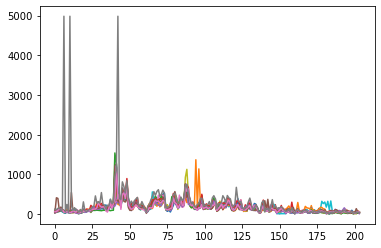

In [54]:
# Plot each cluster max values
K = 2
for k in range(K):
    x = [ i for i in range(204)]
# print(x.s)
     
    y = X_train[c_assign[k].flatten()  ].T[0]
    from matplotlib import pyplot as plt
    plt.plot(x,y)
#     plt.show()

(204, 32)


ValueError: 'c' argument has 32 elements, which is not acceptable for use with 'x' with size 6528, 'y' with size 6528.

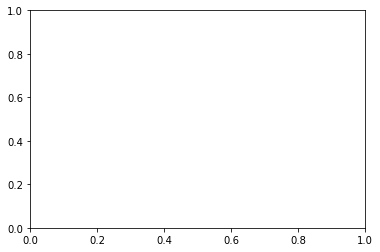

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array( [[ i for i in range(204)]]).T
x_result = np.array( [[ i for i in range(204)]]).T
for i in range(31):
    x_result = np.concatenate((x_result,x),axis = 1)
    
print(x_result.shape)    
y = X_train.T[0]
Cluster = c_assign  # Labels of cluster 0 to 3
# centers = np.random.randn(4, 2) 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_result,y,c=Cluster,s=50)
# for i,j in centers:
#     ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)


In [101]:
#---------------------------------------------------------------------------------
data_dir = '../../Data/'
import pandas as pd
df=pd.read_csv(data_dir+'location_name_lat_lon.csv', sep=',')
df

,location,latitude,longitude
0,"Sonia Vihar, Delhi - DPCC",28.710508,77.249485
1,"Vivek Vihar, Delhi - DPCC",28.672342,77.315260
2,"Okhla Phase-2, Delhi - DPCC",28.530785,77.271255
3,"NSIT Dwarka, Delhi - CPCB",28.609090,77.032541
4,"Jawaharlal Nehru Stadium, Delhi - DPCC",28.580280,77.233829
5,"Ashok Vihar, Delhi - DPCC",28.695381,77.181665
6,"Anand Vihar, Delhi - DPCC",28.646835,77.316032
7,"Mundka, Delhi - DPCC",28.684678,77.076574
8,"Narela, Delhi - DPCC",28.822836,77.101981
9,"Sri Aurobindo Marg, Delhi - DPCC",28.531346,77.190156


In [82]:
df_input = pd.read_csv('dataset.csv',header=None)
np_input = df_input.values
print(np_input.shape)
print(np_input[:,0])

(32, 409)
['Sonia Vihar, Delhi - DPCC' 'Vivek Vihar, Delhi - DPCC'
 'Okhla Phase-2, Delhi - DPCC' 'NSIT Dwarka, Delhi - CPCB'
 'Jawaharlal Nehru Stadium, Delhi - DPCC' 'Ashok Vihar, Delhi - DPCC'
 'Mundka, Delhi - DPCC' 'Narela, Delhi - DPCC'
 'Sri Aurobindo Marg, Delhi - DPCC' 'Patparganj, Delhi - DPCC'
 'Alipur, Delhi - DPCC' 'Mandir Marg, Delhi - DPCC'
 'Nehru Nagar, Delhi - DPCC'
 'Dr. Karni Singh Shooting Range, Delhi - DPCC' 'Bawana, Delhi - DPCC'
 'CRRI Mathura Road, Delhi - IMD' 'IHBAS, Dilshad Garden, Delhi - CPCB'
 'Major Dhyan Chand National Stadium, Delhi - DPCC' 'Rohini, Delhi - DPCC'
 'Jahangirpuri, Delhi - DPCC' 'Shadipur, Delhi - CPCB'
 'Lodhi Road, Delhi - IMD' 'US Diplomatic Post: New Delhi'
 'R K Puram, Delhi - DPCC' 'Wazirpur, Delhi - DPCC'
 'Punjabi Bagh, Delhi - DPCC' 'DTU, Delhi - CPCB'
 'Dwarka-Sector 8, Delhi - DPCC ' 'Najafgarh, Delhi - DPCC'
 'ITO, Delhi - CPCB' 'Aya Nagar, Delhi - IMD'
 'IGI Airport (T3), Delhi - IMD']


In [104]:
clusters = []
lat = []
long = []
location = []
for i in range(np_input.shape[0]):
    loc = np_input[i,0]
    for j in range(df.shape[0]):
        if(df['location'][j]==loc):
            location.append(loc)
            lat.append( df['latitude'][j])
            long.append(df['longitude'][j])
            print(loc,df['latitude'][j])
    clusters.append(c_assign[i])
    
#     df['Cluster'][loc] = c_assign[i]
print(len(clusters))
# print(long)
    

Sonia Vihar, Delhi - DPCC 28.710508
Vivek Vihar, Delhi - DPCC 28.672341999999997
Okhla Phase-2, Delhi - DPCC 28.530784999999998
NSIT Dwarka, Delhi - CPCB 28.609090000000002
Jawaharlal Nehru Stadium, Delhi - DPCC 28.58028
Ashok Vihar, Delhi - DPCC 28.695381
Mundka, Delhi - DPCC 28.684678
Narela, Delhi - DPCC 28.822836
Sri Aurobindo Marg, Delhi - DPCC 28.531346000000003
Patparganj, Delhi - DPCC 28.623748
Alipur, Delhi - DPCC 28.815329
Mandir Marg, Delhi - DPCC 28.636428999999996
Nehru Nagar, Delhi - DPCC 28.567890000000002
Dr. Karni Singh Shooting Range, Delhi - DPCC 28.498571000000002
Bawana, Delhi - DPCC 28.7762
CRRI Mathura Road, Delhi - IMD 28.5512005
IHBAS, Dilshad Garden, Delhi - CPCB 28.681173600000005
Major Dhyan Chand National Stadium, Delhi - DPCC 28.611280999999998
Rohini, Delhi - DPCC 28.732528000000002
Jahangirpuri, Delhi - DPCC 28.73282
Shadipur, Delhi - CPCB 28.651478100000002
Lodhi Road, Delhi - IMD 28.5918245
US Diplomatic Post: New Delhi 28.635759999999998
R K Puram, De

In [91]:
df_input['Cluster'] = clusters

In [93]:
df_input.shape

(32, 410)

In [107]:
new_df = pd.DataFrame() 

In [110]:
new_df["location"] = location
new_df["latitude"] = lat
new_df["longitude"] = long
new_df["cluster"] = clusters

In [111]:
print(new_df)

                                            location   latitude  longitude  \
0                          Sonia Vihar, Delhi - DPCC  28.710508  77.249485   
1                          Vivek Vihar, Delhi - DPCC  28.672342  77.315260   
2                        Okhla Phase-2, Delhi - DPCC  28.530785  77.271255   
3                          NSIT Dwarka, Delhi - CPCB  28.609090  77.032541   
4             Jawaharlal Nehru Stadium, Delhi - DPCC  28.580280  77.233829   
5                          Ashok Vihar, Delhi - DPCC  28.695381  77.181665   
6                               Mundka, Delhi - DPCC  28.684678  77.076574   
7                               Narela, Delhi - DPCC  28.822836  77.101981   
8                   Sri Aurobindo Marg, Delhi - DPCC  28.531346  77.190156   
9                           Patparganj, Delhi - DPCC  28.623748  77.287205   
10                              Alipur, Delhi - DPCC  28.815329  77.153010   
11                         Mandir Marg, Delhi - DPCC  28.636429 

In [112]:
new_df.to_csv("locations_with_cluster_assignments_6Ckusters.csv")